# Chapter 9: Unsupervised Learning Techniques

The majority of data is unlabelled.

The most common Unsupervised task is Dimensionality Reduction.

A few more Unsupervised Learning tasks and algorithms:
- Clustering: groups similar instances into clusters. Good for:
 - Data Analysis
 - Customer segmentation and recommender systems
 - Semi-supervised Learning
 - Dimensionality Reduction
- Anomaly detection
 - Learn what is "normal"
 - Also works in time series
- Density estimation
 - Used for anomaly detection, data analysis, visualization


## Clustering
Clustering is identifying groups of similar objects (etc) and putting them into clusters.

Humans cluster things, subconsciously. For example, you may not know what species a flower is, but if you find a two flowers that are similar, you assume they belong to the same species.

Clustering is similar to the Supervised learning task, classification, except the task is now an Unsupervised task and we do not know the groups (classes, labels) in advance.

Take the iris dataset:

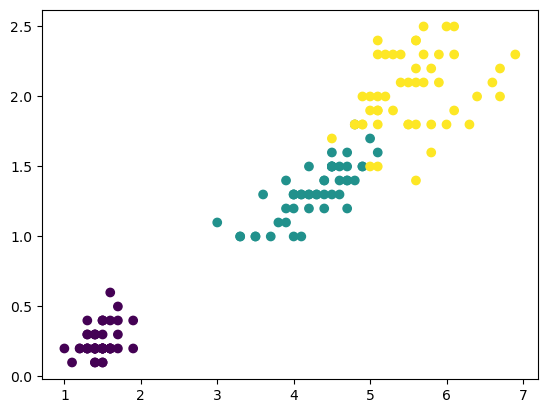

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
data = load_iris()

iris_dat = pd.DataFrame(data['data'], columns = data['feature_names'])
iris_targets = data['target']

plt.figure()
# Plot with target classes color-coded
plt.scatter(iris_dat['petal length (cm)'], iris_dat['petal width (cm)'],
         c = iris_targets);

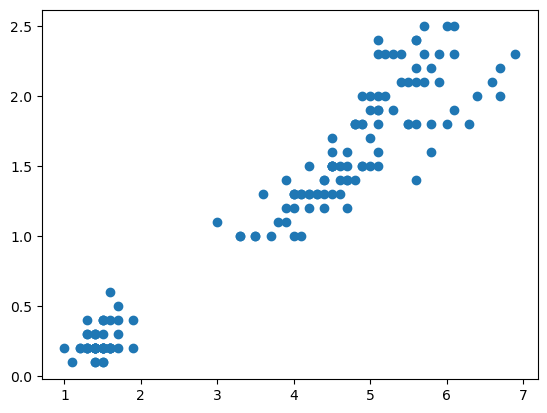

In [2]:
# Plot without classes (unsupervised example)
plt.scatter(iris_dat['petal length (cm)'], iris_dat['petal width (cm)']);

Above, we see the two plots are the same, but the first one has the classes colorized. 

In our unsupervised tasks, we will likely not have target-labels and therefore cannot use classification algorithms.

In the unsupervised algorithms, we would use all four features instead of just the two for petal sizes.

Clustering applications:
- Customer segmentation
 - Based on purchases or activity, etc.
 - This is useful for customers/clients to find what they need, or just market to them.
- Data Analysis
 - Data analysis can be made easier when first clustering the similar instances and analyzing them separately!!! We may only be interested in groups, or it may be easier/feasible to look at them in groups.
- Affinity (dimensionality reduction)
 - Once all instances are clustered, each instance's distance from clusters is its "affinity".
 - Affinity is how well an instance fits into a cluster.
 - The affinity vector replaces the feature vector and has k dimensions instead of n, making it possibly much smaller yet still preserving information
- Anomaly (outlier) detection
 - If an instance has low affinity to all clusters, it could be an outlier
 - i.e. unusual number of requests to a website could be a bot
- Semi-supervised Learning
 - If you have *some* labelled data, you can use clusters to label some of the unlabelled data, then use a supervised learning technique!
- Search Engines
- Image segmentation

There is no universal definition of a cluster.

Different algorithms cluster data differently.

Clusters can take on any shape.

Clusters can be heirarchical; clusters within clusters.

## K-Means
K-Means is an efficient algorithm that clusters instances usually within a few iterations.

In the iris dataset above, there are 3 classes, but only two clusters (a.k.a. "blobs"). In this case, we know there are 3 classes and should be 3 "blobs", so we will use $k = 3$.

In general, we would not know how many clusters beforehand.

In [3]:
X = iris_dat[['petal length (cm)','petal width (cm)']]

In [4]:
from sklearn.cluster import KMeans
k = 3

# Algorithm runs n_init = 10 times by default, keeps lowest inertia
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)

In [5]:
y_pred
# Gives 3 labels as k = 3 clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
# Centroids of the clusters
kcenters = kmeans.cluster_centers_
kcenters

array([[1.462     , 0.246     ],
       [4.26923077, 1.34230769],
       [5.59583333, 2.0375    ]])

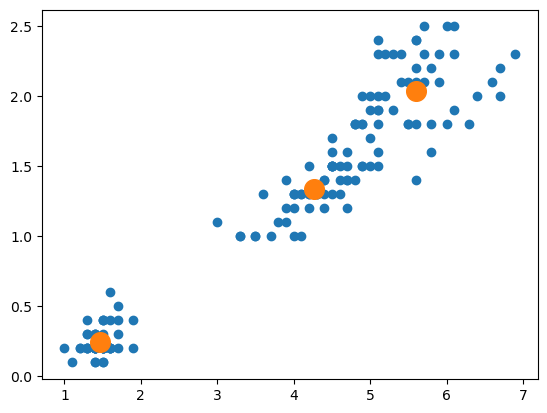

In [12]:
# data with cluster centers (centroids)
plt.scatter(X['petal length (cm)'],X['petal width (cm)']);
plt.scatter(kcenters[:,0],kcenters[:,1], s = 200);

In [8]:
## Look for decision boundaries later

# from scipy.spatial import Voronoi, voronoi_plot_2d
# vor = Voronoi(kcenters)
# voronoi_plot_2d(vor)

The `y_pred` variable above gave the predicted classes for each instance, this is called **hard clustering**.

Another method called **soft clustering** is to *transform the instances into the distance between the instance and every centroid*, or the **affinity**.

Let's create 3 new instances each one representing a class.

In [13]:
X_new = [[1.2, .25], [3.8, 1.2], [6.2,2.3]]
kmeans.predict(X_new)
# It predicts each of the 3 classes as expected, and clusters them accurately

C:\Users\linda\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 1, 2])

In [10]:
# Affinity:
# Tranforming each instance into a distance between it and each cluster
distances = kmeans.transform(X_new)
distances

C:\Users\linda\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([[0.26203053, 4.74536689, 3.2578081 ],
       [2.52514554, 1.98152053, 0.49033559],
       [5.16406429, 0.65872878, 2.1552365 ]])

In this example with `X_new`, we have 2 features and 3 clusters so we are increasing the dimensionality, but if there were fewer clusters than features, this could be a very effective dimensionality reduction technique.

Though K-Means is one of the fastest clustering algorithms, it may converge to a local optimum depending on the centroid initializations.

One solution to avoid local optimums is if, somehow, the proper centroid intialization locations is known, it is possible to initialize the locations with the `init = ` parameter.

Another solution is to run the algorithms many times with different random initializations and to keep the solution with the lowest **inertia**. The KMeans algorithm does this by default.

**Inertia** is the **mean squared distance between each instance and its closest centroid**. 

In [11]:
print(kmeans.inertia_)
# K-Means default score is inertia
print(kmeans.score(X)) # Score is negative as it follows "greater is better" sklearn rule

31.371358974358966
-31.37135897435897


An improvement to K-Means is called K-Means++ and causes centroids to be initialized with great distance from one another; already default. See page 243 for math.

### Finding the optimal number of clusters
Back to the fact that we generally do not know how many clusters we need. Should we just try to get the lowest inertia possible? No, because the more clusters there are, the lower the inertia will inherently be; more clusters means each instance can be closer to a centroid.



In [14]:
inertias = list()               # Hold inertia values
ks = [i+1 for i in range(8)]    # list of 1 - 8


# Looping through ks list and storing inertia for each value (k) in ks
for k in ks:
    inertias.append(KMeans(n_clusters = k).fit(X).inertia_)

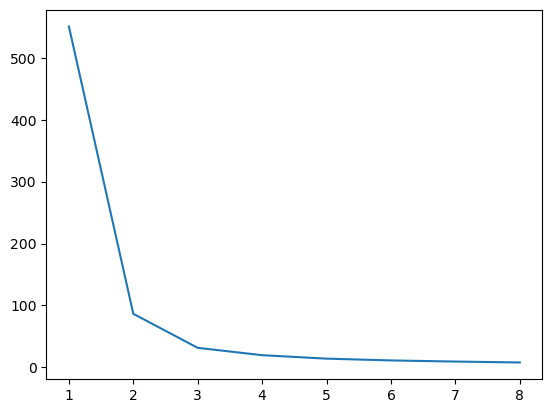

In [17]:
plt.plot(ks, inertias);

This is called the elbow method. We see that k = 2 or k = 3 is the elbow of the graph and that at 
$k \geq 4$ the inertia does not lower much more. But how do we know it is 2 or 3 (other than that we know there are 3 classes in iris). This method is not actually the best.

A better method is the **Silhouette score**. The **Silhouette score** is the mean **silhouette coefficient** among all the instances.

A single instance's silhouette coefficient is:

$silhouette\_coef_i = \dfrac{b-a}{max(a,b)}$

where $a$ = mean distance to all other instances in same cluster

and $b$ = mean distance to the instances of the *next closest cluster*



In [18]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_) # k = 3

0.6604800083974887

At ~.66 the silhouette score seems good relative to the textbook examples. This is with k = 3

We can plot the silhouette scores of different k like with inertia.

In [19]:
ks = [i+1 for i in range(8)][1:]
silly_scores = list() # Silhouette scores

for k in ks:
    kmc = KMeans(n_clusters = k).fit(X)
    silly_scores.append(silhouette_score(X,kmc.labels_))

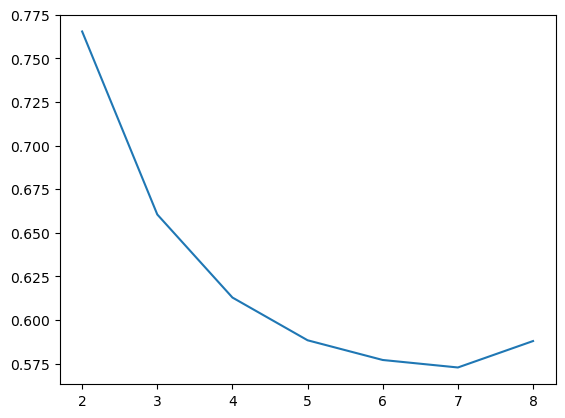

In [20]:
plt.plot(ks,silly_scores);

In this case, the silhouette score is highest when k = 2, but we know that there are 3 clusters. 

Note: The silhouette score plot may look quite different on different datasets.

We can also plot a silhouette diagram that might give us a different answer. (A ton of code to plot)

In [18]:
# from sklearn.metrics import silhouette_samples
# import matplotlib.cm as cm
# import numpy as np
# Use clusters 2, 3, 4, 5
# for k_clusters in ks[:4]:

### Limits of K-Means
K-Means is fast, but it does not perform well when clusters are variable in size or density, or are not spherical, therefore the data must be scaled before using the algorithm. Try Gaussian mixture models on other shapes.

### Clustering for Image Segmentation
This is an example of color segmentation on an image segmentation task. Color segmentation is assigning the same colors to the same segment.

Note: The test talks about *semantic segmentation* and *instance segmentation*.
 - Semantic example: in an image, all pedestrians are classified as pedestrians
 - instance example: each pedestrian is classified as different pedestrians

In [19]:
from matplotlib.image import imread

### Clustering for Preprocessing
We can use Clustering as a Dimensionality Reduction, preprocessing technique for fitting into a Supervised Learning algorithm.

I use Fashion-MNIST as the example dataset.

Remark: Although there are only 10 classes in Fashion-MNIST, not every picture for each class is the same, therefore it is not proper to use only k = 10 clusters. Below k = 50 clusters are used in the KMeans algorithm.

In [6]:
import tensorflow as tf
data = tf.keras.datasets.fashion_mnist.load_data()

In [28]:
X = data[0][0]
y = data[0][1]

X_test = data[1][0]
y_test = data[1][1]

First let's try standard Logistic Regression on the MNIST dataset; it performs well.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.reshape(60000,28*28),y)

# Scaling data
X_train = X_train / 255
X_test = X_test / 255

from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(max_iter = 1000, n_jobs = -1)
lrc.fit(X_train,y_train)

lrc.score(X_test,y_test) # Default scoring for lrc is accuracy

0.8498

Next let's cluster before using Logistic Regrssion.

In [25]:
# Note the 50 clusters
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    
    # n_init is how many times to run KMeans
    ('kmeans', KMeans(n_clusters = 50, n_init = 1)),
    
    # max_iter default == 100, use 1000 to converge
    # n_jobs  = -1 is to use all cpu cores
    ('lrc', LogisticRegression(max_iter = 1000, n_jobs = -1))
])

pipeline.fit(X.reshape(60000,28*28),y)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, n_init=1)),
                ('lrc', LogisticRegression(max_iter=1000, n_jobs=-1))])

In [26]:
pipeline.score(X_test,y_test)

0.8210666666666666

Above, the LRC algorithm does not converge, yet still gives a better accuracy than the preprocessed data. Let's try using **k-foldCV** to sample different numbers of clusters.

K-foldCV removes the need to perform inertia and silhouette analyses.

In [ ]:
from sklearn.model_selection import GridSearchCV

# We can access the kmeans in the pipeline with 
# kmeans__ and its parameter n_clusters
param_grid = dict(kmeans__n_clusters = [100,200,300,400])

grid_clf = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 2)
grid_clf.fit(X_train,y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   8.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   9.4s
[CV] END ...............................kmeans__n_clusters=2; total time=   7.8s
[CV] END ...............................kmeans__n_clusters=3; total time=  11.2s
[CV] END ...............................kmeans__n_clusters=3; total time=  10.6s
[CV] END ...............................kmeans__n_clusters=3; total time=  14.8s
[CV] END ...............................kmeans__n_clusters=4; total time=  15.8s
[CV] END ...............................kmeans__n_clusters=4; total time=  12.5s
[CV] END ...............................kmeans__n_clusters=4; total time=  13.1s
[CV] END ...............................kmeans__n_clusters=5; total time=  16.0s
[CV] END ...............................kmeans__n_clusters=5; total time=  21.7s
[CV] END ...............................kmeans_

In [ ]:
grid_clf.best_params_

### Clustering for Semi-Supervised Learning
For the moment, let's pretend we only have 50 labelled instances (50 images). If we train on only those 50, we're likely to get worse results than when we fit all 60,000 images, as ML algorithms typically perform better with more data.

In [40]:
n_labelled = 50
lrc = LogisticRegression()

# Fit the lrc to our 50 labelled instances (just the first 50 instances sine we're pretending)
lrc.fit(X_train[:n_labelled], y_train[:n_labelled])

# Accuracy
lrc.score(X_test,y_test)

C:\Users\linda\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5481333333333334

As expected, we get pretty poor accuracy on the test set (~55%), but this was only with 50 instances on the Fashion-MNIST set.

What we will do now is find the "representative" images in the dataset; the ones closest to the cluster centers. Recall that the .transform() and fit_transform() methods convert the data into the affinities (distance) of each instance to each cluster. Once we have the affinities for each k = 50 clusters, we will find the instances closest to each cluster: the single closest instance to each of the 50 clusters; one instance representing one cluster.

In [32]:
import numpy as np

# Clusters
k = 50

kmeans = KMeans(n_clusters = k)

# Transforming each instance into k affinity features (its distance to every cluster)
X_image_dist = kmeans.fit_transform(X_train)


# Take the k images closest to each 1 cluster center. np.argmin returns index values
representative_image_idx = np.argmin(X_image_dist, axis = 0)

# Filter training set to the k images
X_representative_images = X_train[representative_image_idx]

print(f'Number of representative images: {len(X_representative_images)}')

# Thankfully we don't need to label the images manually at the moment
y_representative_images = y_train[representative_image_idx]

# Fitting with the representative images
lrc = LogisticRegression(n_jobs = -1, max_iter = 100)
lrc.fit(X_representative_images, y_representative_images)
lrc.score(X_test,y_test)

By selecting 50 "representative" images, we increased the accuracy by 13%, which is a 20% overall increase in accuracy!

Now we can do what's called **label propogation**: *propogate labels to instances in the same cluster*.

In [41]:
y_train_propogated = np.empty(len(X_train), dtype = np.int32)

In [52]:
for i in range(k):
    y_train_propogated[kmeans.labels_ == i] = y_representative_images[i]

In [53]:
lrc = LogisticRegression(n_jobs = -1, max_iter = 100)
lrc.fit(X_train, y_train_propogated)
lrc.score(X_test,y_test)

0.6714

## DBSCAN - Density Based Spatial Clustering... 
Algorithm works well if clusters are dense and clusters are separated by low-density regions. It seems good at working with variable shapes.

Algorithm:
 - For each instance, the algorithm identifies instances within $\epsilon$ distance from the instance.
  - The distance is called the $\epsilon$-neighborhood
 - If the instance has `min_samples` instance in its $\epsilon$-neighborhood, then it is a **core instance**.
  - Core instances are located in dense regions
 - All instances in the neighborhood of a core instance belongs to the same cluster. Since core instances can be neighbors with core instances, long strings of neighboring core instances form a single cluster.
 - Instances that are not core instances AND do not have a core instance in their $\epsilon$-neighborhood are considered anomalies.
 
This example is from the Moons dataset

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = .05)

# eps is neighborhood size
# must have 5 neighbors to be a "core" instance
dbscan = DBSCAN(eps = .05, min_samples = 5)

dbscan.fit(X,y)

DBSCAN(eps=0.05)

In [58]:
# dbscan.labels_ # -1 are considered outliers

array([ 0,  1,  2,  2,  1,  1,  2,  2,  2,  2,  1,  0,  2,  1,  1, -1,  2,
        2, -1,  2,  2,  1,  1,  1, -1,  1,  2, -1,  1,  1,  2,  2,  2,  2,
        1,  2,  1,  2,  1,  2,  1,  2,  1,  0,  0,  2,  2,  1,  1,  1, -1,
        1,  1,  2,  1,  2,  1,  2,  2,  2,  2, -1, -1,  1,  1,  1,  2,  1,
        1,  2, -1,  2,  2,  1,  2,  1,  2,  1,  1,  1,  2,  1,  0,  2,  1,
        1,  2,  1,  1,  2,  1,  2, -1,  2,  2,  1,  2, -1,  0,  2,  1,  2,
        5,  2,  2, -1,  1,  1,  1,  2,  1,  2,  0,  1,  1,  1,  2,  2,  1,
        2,  1,  2,  2,  1, -1,  0,  1,  1,  1,  1, -1,  1,  2,  1,  2, -1,
        2,  2,  1,  2,  1,  2, -1,  2,  1,  1,  1,  2,  1,  1,  2,  2,  2,
        2,  2,  2,  1,  2,  2,  2, -1,  1,  1,  1,  2,  2,  2,  3,  2,  1,
        2,  1,  1,  2,  2,  1,  2,  2,  2,  1,  2,  2,  2, -1,  4,  0,  2,
        2,  2,  1,  2,  1,  2,  2,  1,  1,  1,  2,  1,  1, -1,  2,  0,  2,
        2,  2,  1,  2,  2,  1,  2,  2,  1,  1,  1,  1,  2,  2,  1,  1,  2,
        1,  1,  2,  1,  1

In [59]:
dbscan.components_

array([[-1.00449152,  0.05868874],
       [ 0.28422313,  0.94364835],
       [ 0.73651857, -0.50290448],
       ...,
       [ 0.11201621,  0.95585301],
       [ 0.95523234,  0.01980472],
       [-0.8604534 ,  0.53659503]])

In [60]:
dbscan2 = DBSCAN(eps=.2, min_samples = 5)
dbscan2.fit(X,y)

DBSCAN(eps=0.2)

In [62]:
# Credit for function: Aurelien Geron
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

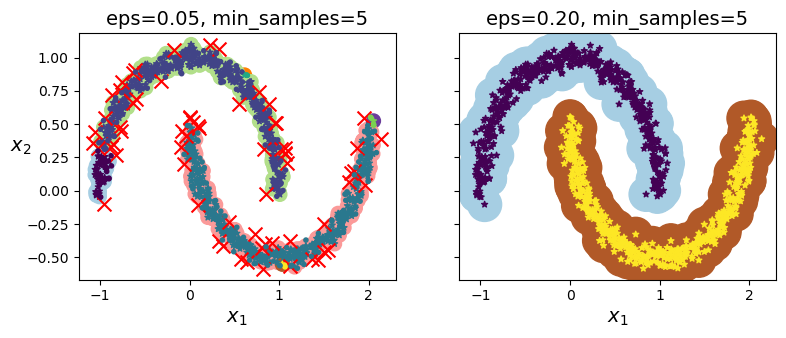

In [63]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

Changing the epsilon-neighborhood from .05 to .2 makes the clusters reduce from 7 -> 2 and the perfectly clusters the instances.

DBSCAN *cannot predict new instances* (but can on old ones), but you can fit the DBSCAN components and labels to other algorithms like KNN and use that to predict.

Note: DBscan's components are its core instances; fit those and its labels; see code below.

In [70]:
print(len(dbscan.labels_))

print(len(dbscan.components_)) # Core instances
print(len(dbscan.labels_[dbscan.core_sample_indices_])) # Labels of core instances

1000
806
806


In [71]:
# We could also train on all instances, not just cores
# just depends on task
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

## Gaussian Mixtures
